* Autora: Isabel Afán de Ribera
* Fecha: 14/01/2021
* Institución: CUNEF

## 1. The World Bank's international debt data
<p>No es que los humanos solo tengamos deudas para administrar nuestras necesidades. Un país también puede endeudarse para administrar su economía. Por ejemplo, el gasto en infraestructura es un ingrediente costoso requerido para que los ciudadanos de un país lleven una vida cómoda. El Banco Mundial es la organización que proporciona deuda a los países.</p>

<!-- <p>En este notebook, vamos a analizar los datos de la deuda internacional recopilados por el Banco Mundial. El conjunto de datos contiene información sobre el monto de la deuda (en USD) que deben los países en desarrollo en varias categorías.</p>  -->
    

"Disbursements on external debt, long-term (DIS, current US$)",DT.DIS.DLXF.CD
"Interest payments on external debt, long-term (INT, current US$)",DT.INT.DLXF.CD
"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD
"PPG, bilateral (DIS, current US$)",DT.DIS.BLAT.CD
"PPG, bilateral (INT, current US$)",DT.INT.BLAT.CD
"PPG, multilateral (AMT, current US$)",DT.AMT.MLAT.CD
"PPG, multilateral (DIS, current US$)",DT.DIS.MLAT.CD
"PPG, multilateral (INT, current US$)",DT.INT.MLAT.CD
"PPG, official creditors (AMT, current US$)",DT.AMT.OFFT.CD
"PPG, official creditors (DIS, current US$)",DT.DIS.OFFT.CD
"PPG, official creditors (INT, current US$)",DT.INT.OFFT.CD
"Principal repayments on external debt, long-term (AMT, current US$)",DT.AMT.DLXF.CD
"Interest payments on external debt, private nonguaranteed (PNG) (INT, current US$)",DT.INT.DPNG.CD
"PPG, bonds (AMT, current US$)",DT.AMT.PBND.CD
"PPG, bonds (INT, current US$)",DT.INT.PBND.CD
"PPG, commercial banks (AMT, current US$)",DT.AMT.PCBK.CD
"PPG, commercial banks (DIS, current US$)",DT.DIS.PCBK.CD
"PPG, commercial banks (INT, current US$)",DT.INT.PCBK.CD
"PPG, other private creditors (AMT, current US$)",DT.AMT.PROP.CD
"PPG, other private creditors (DIS, current US$)",DT.DIS.PROP.CD
"PPG, other private creditors (INT, current US$)",DT.INT.PROP.CD
"PPG, private creditors (AMT, current US$)",DT.AMT.PRVT.CD
"PPG, private creditors (DIS, current US$)",DT.DIS.PRVT.CD
"PPG, private creditors (INT, current US$)",DT.INT.PRVT.CD
"Principal repayments on external debt, private nonguaranteed (PNG) (AMT, current US$)",DT.AMT.DPNG.CD

<p>Vamos a encontrar las respuestas a preguntas como:

<p>¿Cuál es el monto total de la deuda que deben los países enumerados en el conjunto de datos?
<p>¿Qué país posee la cantidad máxima de deuda y cómo se ve esa cantidad?
<p>¿Cuál es el monto promedio de la deuda de los países a través de diferentes indicadores de deuda?
    
Además tenemos otro dataset en el que encontramos información histórica de algunos índices de desarrollo, entre los que se encuentran algunos de deuda como son:

Series Name,Series Code
"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN

"Central government debt, total (current LCU)",GC.DOD.TOTL.CN

"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS

#### 1. Inicializar y cargar el contexto spark

* Carga del contexto spark y librerias necesarias

In [1]:
# cargamos la libreria y el contexto spark para tener acceso al cluster
from pyspark import SparkContext
sc = SparkContext()

In [2]:
# tambien la sesion spark
from pyspark.sql.session import SparkSession
spark = SparkSession(sc)

In [3]:
# importamos libreria pyspark.sql y el contexto sql
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [4]:
# libreria functions para trabajar con funciones agregadas
import pyspark.sql.functions as f

In [5]:
# para convertir el tipo de dato
from pyspark.sql.types import (StringType, DoubleType, FloatType,
                               IntegerType)

* Carga y tratamiento de datos

In [6]:
# cargamos el dataset de deuda con la funcion textFile
data_file = "./indicadores_deuda.csv"
raw_data_deuda = sc.textFile(data_file)

In [7]:
# y a continuación el de desarrollo
data_file_d = "./indicadores_desarrollo.csv"
raw_data_desarrollo = sc.textFile(data_file_d)

In [8]:
# conteo de registros de deuda
raw_data_deuda.count()

125

In [9]:
# conteo de registros de desarrollo
raw_data_desarrollo.count()

135

In [10]:
# vemos la estructura de los datos de deuda, son datos de tipo string

raw_data_deuda.take(5)

['country_name,country_code,DT.AMT.BLAT.CD,DT.AMT.DLXF.CD,DT.AMT.DPNG.CD,DT.AMT.MLAT.CD,DT.AMT.OFFT.CD,DT.AMT.PBND.CD,DT.AMT.PCBK.CD,DT.AMT.PROP.CD,DT.AMT.PRVT.CD,DT.DIS.BLAT.CD,DT.DIS.DLXF.CD,DT.DIS.MLAT.CD,DT.DIS.OFFT.CD,DT.DIS.PCBK.CD,DT.DIS.PROP.CD,DT.DIS.PRVT.CD,DT.INT.BLAT.CD,DT.INT.DLXF.CD,DT.INT.DPNG.CD,DT.INT.MLAT.CD,DT.INT.OFFT.CD,DT.INT.PBND.CD,DT.INT.PCBK.CD,DT.INT.PROP.CD,DT.INT.PRVT.CD',
 'Afghanistan,AFG,61739336.9,100847181.9,,39107845,100847181.9,,,,,49114729.4,72894453.7,23779724.3,72894453.7,,,,39903620.1,53239440.1,,13335820,53239440.1,,,,',
 'Albania,ALB,54250280.6,790248675.2,514185620,182197616.7,236447897.3,0,39445139.5,170018.4,39615157.9,76050616.1,317194512.5,234321242.3,310371858.4,4542664.9,2279989.2,6822654.1,13847333.6,165602386.9,87884000,28101536.1,41948869.7,31030688.2,4618504.3,120324.7,35769517.2',
 'Algeria,DZA,95188724.6,171185188.1,75420000,0,95188724.6,,576463.5,0,576463.5,10320772.2,10320772.2,,10320772.2,,,,7680627.6,19031728.7,3220000,8094779,

In [11]:
# con el take anterior hemos visto que el dataset deuda contiene una cabecera
# comprobamos lo que contiene 
head_deuda = raw_data_deuda.take(1)[0]
head_deuda

'country_name,country_code,DT.AMT.BLAT.CD,DT.AMT.DLXF.CD,DT.AMT.DPNG.CD,DT.AMT.MLAT.CD,DT.AMT.OFFT.CD,DT.AMT.PBND.CD,DT.AMT.PCBK.CD,DT.AMT.PROP.CD,DT.AMT.PRVT.CD,DT.DIS.BLAT.CD,DT.DIS.DLXF.CD,DT.DIS.MLAT.CD,DT.DIS.OFFT.CD,DT.DIS.PCBK.CD,DT.DIS.PROP.CD,DT.DIS.PRVT.CD,DT.INT.BLAT.CD,DT.INT.DLXF.CD,DT.INT.DPNG.CD,DT.INT.MLAT.CD,DT.INT.OFFT.CD,DT.INT.PBND.CD,DT.INT.PCBK.CD,DT.INT.PROP.CD,DT.INT.PRVT.CD'

In [12]:
# tras ver la estructura realizamos un parseo de los datos con el objetivo de facilitar su tratamiento
# primero quitamos la cabecera y luego separamos por coma
# obtenemos una lista
parsed_data_deuda = raw_data_deuda.filter(lambda s: s != head_deuda) \
                                  .map(lambda x: x.split(","))
parsed_data_deuda.take(2)

[['Afghanistan',
  'AFG',
  '61739336.9',
  '100847181.9',
  '',
  '39107845',
  '100847181.9',
  '',
  '',
  '',
  '',
  '49114729.4',
  '72894453.7',
  '23779724.3',
  '72894453.7',
  '',
  '',
  '',
  '39903620.1',
  '53239440.1',
  '',
  '13335820',
  '53239440.1',
  '',
  '',
  '',
  ''],
 ['Albania',
  'ALB',
  '54250280.6',
  '790248675.2',
  '514185620',
  '182197616.7',
  '236447897.3',
  '0',
  '39445139.5',
  '170018.4',
  '39615157.9',
  '76050616.1',
  '317194512.5',
  '234321242.3',
  '310371858.4',
  '4542664.9',
  '2279989.2',
  '6822654.1',
  '13847333.6',
  '165602386.9',
  '87884000',
  '28101536.1',
  '41948869.7',
  '31030688.2',
  '4618504.3',
  '120324.7',
  '35769517.2']]

In [13]:
# vemos la estructura de los datos de desarrollo, son datos de tipo string
raw_data_desarrollo.take(5)

['country_name,country_code,anho,GC.DOD.TOTL.CN,GC.DOD.TOTL.GD.ZS,SP.DYN.CBRT.IN',
 'Albania,ALB,2014 [YR2014],1023040800000,73.3202469198429,12.259',
 'Albania,ALB,2015 [YR2015],1145500940000,79.8644448747259,12.197',
 'Albania,ALB,2016 [YR2016],1188814490000,80.7355748396923,12.08',
 'Australia,AUS,2014 [YR2014],674700000,0.042207528166503,13.2']

In [14]:
# en el dataset desarrollo tambien hay cabecera, le echamos un vistazo
head_desarrollo = raw_data_desarrollo.take(1)[0]
head_desarrollo

'country_name,country_code,anho,GC.DOD.TOTL.CN,GC.DOD.TOTL.GD.ZS,SP.DYN.CBRT.IN'

In [15]:
# repetimos con los datos de desarrollo
parsed_data_desarrollo = raw_data_desarrollo.filter(lambda s: s != head_desarrollo) \
                                            .map(lambda x: x.split(","))
parsed_data_desarrollo.take(2)

[['Albania',
  'ALB',
  '2014 [YR2014]',
  '1023040800000',
  '73.3202469198429',
  '12.259'],
 ['Albania',
  'ALB',
  '2015 [YR2015]',
  '1145500940000',
  '79.8644448747259',
  '12.197']]

##### 2. Número de países distintos en cada dataset. ¿Coinciden?

In [16]:
countries_deuda = parsed_data_deuda.map(lambda x: x[0]).distinct()
print("El dataset deuda contiene {} países distintos.".format(countries_deuda.count()))

El dataset deuda contiene 123 países distintos.


In [17]:
countries_desarrollo = parsed_data_desarrollo.map(lambda x: x[0]).distinct()
print("El dataset desarrollo contiene {} países distintos.".format(countries_desarrollo.count()))

El dataset desarrollo contiene 51 países distintos.


* __Nota__: a partir de aquí trabajaré con Spark's DataFrame por lo tanto volveré a cargar los datos, esta vez como Data Frame en lugar de RDD.

##### 3. Total de deuda contraida por cada pais: total amount of debt (in USD) DT.AMT.MLAT.CD

In [18]:
deuda_df = spark.read.csv("indicadores_deuda.csv", header=True)
deuda_df.show(2)

+------------+------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
|country_name|country_code|DT.AMT.BLAT.CD|DT.AMT.DLXF.CD|DT.AMT.DPNG.CD|DT.AMT.MLAT.CD|DT.AMT.OFFT.CD|DT.AMT.PBND.CD|DT.AMT.PCBK.CD|DT.AMT.PROP.CD|DT.AMT.PRVT.CD|DT.DIS.BLAT.CD|DT.DIS.DLXF.CD|DT.DIS.MLAT.CD|DT.DIS.OFFT.CD|DT.DIS.PCBK.CD|DT.DIS.PROP.CD|DT.DIS.PRVT.CD|DT.INT.BLAT.CD|DT.INT.DLXF.CD|DT.INT.DPNG.CD|DT.INT.MLAT.CD|DT.INT.OFFT.CD|DT.INT.PBND.CD|DT.INT.PCBK.CD|DT.INT.PROP.CD|DT.INT.PRVT.CD|
+------------+------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--

In [19]:
# teniendo en cuenta que el dataset deuda contiene muchas columnas voy a renombrar solo aquellas que 
# me van a ser de utilidad en este análisis, para que no me den problemas al trabajar con ellas

deuda_df = (deuda_df.withColumnRenamed("DT.AMT.MLAT.CD","dt_amt_mlat_cd")
                   .withColumnRenamed("DT.AMT.BLAT.CD", "dt_amt_blat_cd")
                   .withColumnRenamed("DT.DIS.BLAT.CD", "dt_dis_blat_cd")
                   .withColumnRenamed("DT.INT.BLAT.CD", "dt_int_blat_cd")
                   .withColumnRenamed("DT.AMT.DLXF.CD","dt_amt_dlxf_cd"))

deuda_df.show(2)

+------------+------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
|country_name|country_code|dt_amt_blat_cd|dt_amt_dlxf_cd|DT.AMT.DPNG.CD|dt_amt_mlat_cd|DT.AMT.OFFT.CD|DT.AMT.PBND.CD|DT.AMT.PCBK.CD|DT.AMT.PROP.CD|DT.AMT.PRVT.CD|dt_dis_blat_cd|DT.DIS.DLXF.CD|DT.DIS.MLAT.CD|DT.DIS.OFFT.CD|DT.DIS.PCBK.CD|DT.DIS.PROP.CD|DT.DIS.PRVT.CD|dt_int_blat_cd|DT.INT.DLXF.CD|DT.INT.DPNG.CD|DT.INT.MLAT.CD|DT.INT.OFFT.CD|DT.INT.PBND.CD|DT.INT.PCBK.CD|DT.INT.PROP.CD|DT.INT.PRVT.CD|
+------------+------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--

In [20]:
# compruebo el tipo de datos
deuda_df.printSchema()

root
 |-- country_name: string (nullable = true)
 |-- country_code: string (nullable = true)
 |-- dt_amt_blat_cd: string (nullable = true)
 |-- dt_amt_dlxf_cd: string (nullable = true)
 |-- DT.AMT.DPNG.CD: string (nullable = true)
 |-- dt_amt_mlat_cd: string (nullable = true)
 |-- DT.AMT.OFFT.CD: string (nullable = true)
 |-- DT.AMT.PBND.CD: string (nullable = true)
 |-- DT.AMT.PCBK.CD: string (nullable = true)
 |-- DT.AMT.PROP.CD: string (nullable = true)
 |-- DT.AMT.PRVT.CD: string (nullable = true)
 |-- dt_dis_blat_cd: string (nullable = true)
 |-- DT.DIS.DLXF.CD: string (nullable = true)
 |-- DT.DIS.MLAT.CD: string (nullable = true)
 |-- DT.DIS.OFFT.CD: string (nullable = true)
 |-- DT.DIS.PCBK.CD: string (nullable = true)
 |-- DT.DIS.PROP.CD: string (nullable = true)
 |-- DT.DIS.PRVT.CD: string (nullable = true)
 |-- dt_int_blat_cd: string (nullable = true)
 |-- DT.INT.DLXF.CD: string (nullable = true)
 |-- DT.INT.DPNG.CD: string (nullable = true)
 |-- DT.INT.MLAT.CD: string (null

In [21]:
# casteo el tipo de dato string a float de la variable dt_amt_mlat_cd
deuda_df.withColumn("dt_amt_mlat_cd", f.col("dt_amt_mlat_cd").cast(FloatType()))

DataFrame[country_name: string, country_code: string, dt_amt_blat_cd: string, dt_amt_dlxf_cd: string, DT.AMT.DPNG.CD: string, dt_amt_mlat_cd: float, DT.AMT.OFFT.CD: string, DT.AMT.PBND.CD: string, DT.AMT.PCBK.CD: string, DT.AMT.PROP.CD: string, DT.AMT.PRVT.CD: string, dt_dis_blat_cd: string, DT.DIS.DLXF.CD: string, DT.DIS.MLAT.CD: string, DT.DIS.OFFT.CD: string, DT.DIS.PCBK.CD: string, DT.DIS.PROP.CD: string, DT.DIS.PRVT.CD: string, dt_int_blat_cd: string, DT.INT.DLXF.CD: string, DT.INT.DPNG.CD: string, DT.INT.MLAT.CD: string, DT.INT.OFFT.CD: string, DT.INT.PBND.CD: string, DT.INT.PCBK.CD: string, DT.INT.PROP.CD: string, DT.INT.PRVT.CD: string]

In [22]:
# agrupo los datos por paises y hago un sumatorio para calcular el total de deuda multilateral de cada pais

deuda_pais = deuda_df.groupby(["country_name"]).agg(f.sum("dt_amt_mlat_cd").alias('deuda_total'))
deuda_pais.show()

# el resultado es dado en notación científica

+--------------------+--------------+
|        country_name|   deuda_total|
+--------------------+--------------+
|          South Asia|7.8517399295E9|
|                Chad|  9.57387095E7|
|            Paraguay| 2.076620309E8|
|    Congo, Dem. Rep.|  1.43105462E8|
|             Senegal| 1.704379291E8|
|          Cabo Verde|  3.99701249E7|
|Least developed c...|4.0842755242E9|
|      Macedonia, FYR| 1.859528672E8|
|              Guyana|  3.46518065E7|
|             Eritrea|  1.54824754E7|
|         Philippines| 7.390564273E8|
|            Djibouti|  3.42549092E7|
|               Tonga|     2791253.2|
|                Fiji|     9082442.6|
|              Turkey| 2.932698678E9|
|              Malawi|  3.56598314E7|
|             Comoros|     2182053.1|
|         Afghanistan|   3.9107845E7|
|            Cambodia|  7.23070018E7|
|              Jordan| 2.704987155E8|
+--------------------+--------------+
only showing top 20 rows



##### 4. Media de los indicadores de deuda (tabla uno): DT.AMT.BLAT.CD, DT.DIS.BLAT.CD, DT.INT.BLAT.CD

In [23]:
# media del indicador DT.AMT.BLAT.CD 

media_indicador1 = deuda_df.select(['dt_amt_blat_cd']).agg(f.avg('dt_amt_blat_cd').alias('media'))
media_indicador1.show()

+-------------------+
|              media|
+-------------------+
|7.126196346598358E8|
+-------------------+



In [24]:
# media del indicador DT.DIS.BLAT.CD
deuda_df.select(['dt_dis_blat_cd']).agg(f.avg('dt_dis_blat_cd').alias('media')).show()

+------------------+
|             media|
+------------------+
|1.22313929039823E9|
+------------------+



In [25]:
# media del indicador DT.INT.BLAT.CD
deuda_df.select(['dt_int_blat_cd']).agg(f.avg('dt_int_blat_cd').alias('media')).show()

+-------------------+
|              media|
+-------------------+
|1.640932856090164E8|
+-------------------+



##### 5. Los 20 paises con DT.AMT.DLXF.CD más alto

Primero agrupo por países y hago el sumatorio de la variable DT.AMT.DLXF.CD para saber el total de cada país. Posteriomente aplico la funcion orderBy para que devuelva los valores ordenados de forma descendente apareciendo en primer lugar los 20 con DT.AMT.DLXF.CD más alto.

In [26]:
#  DT.AMT.DLXF.CD - Principal repayments on external debt, long-term 

pre_20_paises = deuda_df.groupby(["country_name"]).agg(f.sum("dt_amt_dlxf_cd").alias('repayments'))
pre_20_paises.orderBy('repayments', ascending=False).show()

+--------------------+----------------+
|        country_name|      repayments|
+--------------------+----------------+
|               China|9.62186208357E10|
|              Brazil|9.00418403041E10|
|  Russian Federation|6.65897618335E10|
|              Turkey|5.15550310058E10|
|          South Asia|4.87562958982E10|
|               India|3.19235070008E10|
|           Indonesia|3.09161126538E10|
|          Kazakhstan|2.74820936864E10|
|              Mexico| 2.5218503927E10|
|Least developed c...|2.51970292994E10|
|            IDA only| 2.0483289208E10|
|             Romania|1.40137833504E10|
|            Colombia|1.19856744387E10|
|              Angola|1.10670456281E10|
|            Cameroon|1.04048149602E10|
|       Venezuela, RB|  9.8786592072E9|
|    Egypt, Arab Rep.|  9.6921141769E9|
|             Lebanon|  9.5069196696E9|
|        South Africa|  9.4742575519E9|
|             Vietnam|  8.8735059092E9|
+--------------------+----------------+
only showing top 20 rows



##### 6. Pais con los datos informados todos los años.

In [27]:
# cargamos los datos como dataframe
desarrollo_df = spark.read.csv("indicadores_desarrollo.csv", header=True)
desarrollo_df.show()

+------------+------------+-------------+----------------+------------------+--------------+
|country_name|country_code|         anho|  GC.DOD.TOTL.CN| GC.DOD.TOTL.GD.ZS|SP.DYN.CBRT.IN|
+------------+------------+-------------+----------------+------------------+--------------+
|     Albania|         ALB|2014 [YR2014]|   1023040800000|  73.3202469198429|        12.259|
|     Albania|         ALB|2015 [YR2015]|   1145500940000|  79.8644448747259|        12.197|
|     Albania|         ALB|2016 [YR2016]|   1188814490000|  80.7355748396923|         12.08|
|   Australia|         AUS|2014 [YR2014]|       674700000| 0.042207528166503|          13.2|
|   Australia|         AUS|2015 [YR2015]|       762718000|0.0469480198522591|          12.9|
|   Australia|         AUS|2016 [YR2016]|       907555000| 0.054648482520169|          12.9|
|Bahamas, The|         BHS|2014 [YR2014]|      5158420000|  47.2672793747079|         14.34|
|Bahamas, The|         BHS|2015 [YR2015]|      5655150000|  48.1195170

In [28]:
# renombramos las columnas para poder trabajar con ellas

desarrollo_df = (desarrollo_df.withColumnRenamed("anho","year")
                              .withColumnRenamed("GC.DOD.TOTL.GD.ZS","gc_dod_totl_gd_zs")
                              .withColumnRenamed("GC.DOD.TOTL.CN","gc_dod_totl_cn")
                              .withColumnRenamed("SP.DYN.CBRT.IN","sp_dyn_cbrt_in"))
desarrollo_df.show()

+------------+------------+-------------+----------------+------------------+--------------+
|country_name|country_code|         year|  gc_dod_totl_cn| gc_dod_totl_gd_zs|sp_dyn_cbrt_in|
+------------+------------+-------------+----------------+------------------+--------------+
|     Albania|         ALB|2014 [YR2014]|   1023040800000|  73.3202469198429|        12.259|
|     Albania|         ALB|2015 [YR2015]|   1145500940000|  79.8644448747259|        12.197|
|     Albania|         ALB|2016 [YR2016]|   1188814490000|  80.7355748396923|         12.08|
|   Australia|         AUS|2014 [YR2014]|       674700000| 0.042207528166503|          13.2|
|   Australia|         AUS|2015 [YR2015]|       762718000|0.0469480198522591|          12.9|
|   Australia|         AUS|2016 [YR2016]|       907555000| 0.054648482520169|          12.9|
|Bahamas, The|         BHS|2014 [YR2014]|      5158420000|  47.2672793747079|         14.34|
|Bahamas, The|         BHS|2015 [YR2015]|      5655150000|  48.1195170

Los distintos años que incluye el dataset desarrollo son 2014, 2015, 2016 y 2017.

In [29]:
desarrollo_df.select('year').distinct().show()

+-------------+
|         year|
+-------------+
|2016 [YR2016]|
|2014 [YR2014]|
|2017 [YR2017]|
|2015 [YR2015]|
+-------------+



Ahora agrupamos el dataset _desarrollo_ por el nombre de país y contamos cuantas veces se repite. De este modo sabremos que país se repite 4 veces y, por tanto, que incluye sus datos durante los 4 años. En último lugar filtro por recuento de 4 y obtengo que el único país con los datos informados todos los años es Malawi.

In [30]:
country_count = desarrollo_df.groupby('country_name').count()
country_count.filter("count == 4").show()

+------------+-----+
|country_name|count|
+------------+-----+
|      Malawi|    4|
+------------+-----+



##### 7. Media anual de los distintos indicadores de desarrollo

Para calcular la media anual de los distintos indicadores de desarrollo agrupamos cada indicador por años y realizamos una función de agregado average para calcular la media anual. Después, se ha aplicado la función orderBy para que nos devuelva los datos por orden de años de 2014 a 2017.

In [31]:
# media anual GC.DOD.TOTL.GD.ZS
indicador_1_avg = desarrollo_df.groupby('year').agg(f.avg('gc_dod_totl_cn').alias('media_anual')).orderBy('year', ascending=True)
indicador_1_avg.show(5)

+-------------+--------------------+
|         year|         media_anual|
+-------------+--------------------+
|2014 [YR2014]|1.034427587329532...|
|2015 [YR2015]|1.318244039159024...|
|2016 [YR2016]|1.588138215480659...|
|2017 [YR2017]| 2.23985861996269E12|
+-------------+--------------------+



In [32]:
# media anual GC.DOD.TOTL.CN
indicador_2_avg = desarrollo_df.groupby('year').agg(f.avg('gc_dod_totl_gd_zs').alias('media_anual')).orderBy('year', ascending=True)
indicador_2_avg.show(5)

+-------------+------------------+
|         year|       media_anual|
+-------------+------------------+
|2014 [YR2014]|56.843914344384395|
|2015 [YR2015]| 58.36559834488036|
|2016 [YR2016]|58.796949624008356|
|2017 [YR2017]|   48.659564238322|
+-------------+------------------+



In [33]:
# media anual SP.DYN.CBRT.IN
indicador_3_avg = desarrollo_df.groupby('year').agg(f.avg('sp_dyn_cbrt_in').alias('media_anual')).orderBy('year', ascending=True)
indicador_3_avg.show(5)

+-------------+------------------+
|         year|       media_anual|
+-------------+------------------+
|2014 [YR2014]|          17.58262|
|2015 [YR2015]|16.798477272727276|
|2016 [YR2016]| 16.14433333333333|
|2017 [YR2017]|            34.593|
+-------------+------------------+



##### 8. Podrías decirme el total de deuda acumulada DT.AMT.MLAT.CD por los 10 países con un valor en media menor de SP.DYN.CBRT.IN

En primer lugar cargo los datos de deuda acumulada DT.AMT.MLAT.CD que habia calculado en el apartado 3.

In [34]:
deuda_pais.show()

+--------------------+--------------+
|        country_name|   deuda_total|
+--------------------+--------------+
|          South Asia|7.8517399295E9|
|                Chad|  9.57387095E7|
|            Paraguay| 2.076620309E8|
|    Congo, Dem. Rep.|  1.43105462E8|
|             Senegal| 1.704379291E8|
|          Cabo Verde|  3.99701249E7|
|Least developed c...|4.0842755242E9|
|      Macedonia, FYR| 1.859528672E8|
|              Guyana|  3.46518065E7|
|             Eritrea|  1.54824754E7|
|         Philippines| 7.390564273E8|
|            Djibouti|  3.42549092E7|
|               Tonga|     2791253.2|
|                Fiji|     9082442.6|
|              Turkey| 2.932698678E9|
|              Malawi|  3.56598314E7|
|             Comoros|     2182053.1|
|         Afghanistan|   3.9107845E7|
|            Cambodia|  7.23070018E7|
|              Jordan| 2.704987155E8|
+--------------------+--------------+
only showing top 20 rows



Posteriormente, calculo la tasa media de natalidad agrupando los datos por país.

In [35]:
# SP.DYN.CBRT.IN - tasa de natalidad
tasa_media = desarrollo_df.groupby("country_name").agg(f.avg("sp_dyn_cbrt_in").alias('tasa_media'))
tasa_media.show()

+-------------------+------------------+
|       country_name|        tasa_media|
+-------------------+------------------+
|        Philippines|            22.935|
|              Tonga|25.362333333333336|
|           Malaysia|17.017333333333333|
|          Singapore| 9.633333333333333|
|             Turkey|16.717333333333332|
|             Malawi|            35.556|
|             Jordan|            24.305|
|              Palau|13.133333333333333|
|          Sri Lanka|            16.729|
|         San Marino|              8.05|
|            Albania|12.178666666666667|
|               Peru|18.564666666666668|
|          St. Lucia|            12.502|
|      United States|12.366666666666665|
|            Belarus|12.466666666666667|
|St. Kitts and Nevis|              12.6|
|              Spain|               9.0|
|           Barbados|            10.861|
| Russian Federation|13.166666666666666|
|            Ireland|              13.9|
+-------------------+------------------+
only showing top

Ahora uno los dos dataset, el de deuda total y el de tasa media.

In [36]:
union_df = deuda_pais.join(tasa_media, on='country_name', how ='inner')
union_df.show()

+------------------+--------------+------------------+
|      country_name|   deuda_total|        tasa_media|
+------------------+--------------+------------------+
|       Philippines| 7.390564273E8|            22.935|
|             Tonga|     2791253.2|25.362333333333336|
|            Turkey| 2.932698678E9|16.717333333333332|
|            Malawi|  3.56598314E7|            35.556|
|            Jordan| 2.704987155E8|            24.305|
|         Sri Lanka| 4.497719611E8|            16.729|
|           Albania| 1.821976167E8|12.178666666666667|
|              Peru|   5.5363409E8|18.564666666666668|
|         St. Lucia|  1.50192163E7|            12.502|
|           Belarus|  5.95438826E8|12.466666666666667|
|Russian Federation|    1.416695E8|13.166666666666666|
|          Thailand|  3.90715715E7|           10.9175|
|            Bhutan|  1.73904205E7|            17.791|
|           Ukraine|1.0724728303E9|              10.6|
|           Georgia| 1.440624015E8|            14.056|
|         

Y ordeno los datos de forma ascendente según tasa media de natalidad limitandolo a los 10 primeros registros que se corresponderán con los países con tasa media más baja.

In [37]:
deuda_nat = union_df.orderBy('tasa_media', ascending=True).limit(10)
deuda_nat.show()
# aquí tenemos los 10 países con menor tasa de natalidad y su correspondiente deuda

+--------------------+--------------+------------------+
|        country_name|   deuda_total|        tasa_media|
+--------------------+--------------+------------------+
|             Ukraine|1.0724728303E9|              10.6|
|             Moldova| 1.358428655E8|10.604333333333335|
|            Thailand|  3.90715715E7|           10.9175|
|             Albania| 1.821976167E8|12.178666666666667|
|             Belarus|  5.95438826E8|12.466666666666667|
|           St. Lucia|  1.50192163E7|            12.502|
|  Russian Federation|    1.416695E8|13.166666666666666|
|             Georgia| 1.440624015E8|            14.056|
|              Brazil|2.5143187416E9|14.467666666666666|
|St. Vincent and t...|  2.16156007E7|            15.011|
+--------------------+--------------+------------------+



In [38]:
deuda_nat.agg(f.sum("deuda_total")).show()
# total de deuda acumulada por los 10 paises con menor tasa de natalidad

+-------------------+
|   sum(deuda_total)|
+-------------------+
|4.861709170099999E9|
+-------------------+



##### 9. ¿Hay alguna relación entre los nacimientos y el indicador DT.AMT.DLXF.CD? ¿Cómo podrías demostrarlo?

Para comprobar si existe relación entre estas dos variables vamos a calcular su correlación y a realizar un scatter plot con el que ver de forma visual la relación entre estas dos variables.

In [39]:
# DT.AMT.DLXF.CD - Principal repayments on external debt, long-term 
# hago el sumatorio de esta variable del dataset deuda_df para luego juntar unicamente esa columna con el dataset de desarrollo 
# donde se encuntra la variable sobre tasa de natalidad
repay = deuda_df.groupby(["country_name"]).agg(f.sum("dt_amt_dlxf_cd"). alias('dt_amt_dlxf_cd'))

In [40]:
# juntos los dataset
union_df2 = repay.join(desarrollo_df, on='country_name', how='inner')
union_df2.show(10)

+------------+----------------+------------+-------------+----------------+-----------------+--------------+
|country_name|  dt_amt_dlxf_cd|country_code|         year|  gc_dod_totl_cn|gc_dod_totl_gd_zs|sp_dyn_cbrt_in|
+------------+----------------+------------+-------------+----------------+-----------------+--------------+
| Philippines|  6.4791709177E9|         PHL|2014 [YR2014]|    5.735242e+12| 45.3946271793812|        22.935|
|       Tonga|    1.03699106E7|         TON|2016 [YR2016]|       460835620| 51.8083889825745|        24.977|
|       Tonga|    1.03699106E7|         TON|2015 [YR2015]|       434560045| 51.3603646141118|        25.354|
|       Tonga|    1.03699106E7|         TON|2014 [YR2014]|       378478931|   47.04523691734|        25.756|
|      Turkey|5.15550310058E10|         TUR|2016 [YR2016]|831394045789.176| 31.8721809053214|        16.494|
|      Turkey|5.15550310058E10|         TUR|2015 [YR2015]|683048720324.166| 29.2069977270683|        16.718|
|      Turkey|5.155

In [41]:
union_df2 = union_df2.select(["country_name", "dt_amt_dlxf_cd", "sp_dyn_cbrt_in"])
union_df2.show()

+------------+----------------+--------------+
|country_name|  dt_amt_dlxf_cd|sp_dyn_cbrt_in|
+------------+----------------+--------------+
| Philippines|  6.4791709177E9|        22.935|
|       Tonga|    1.03699106E7|        24.977|
|       Tonga|    1.03699106E7|        25.354|
|       Tonga|    1.03699106E7|        25.756|
|      Turkey|5.15550310058E10|        16.494|
|      Turkey|5.15550310058E10|        16.718|
|      Turkey|5.15550310058E10|         16.94|
|      Malawi|    5.74223731E7|        34.593|
|      Malawi|    5.74223731E7|        35.163|
|      Malawi|    5.74223731E7|        35.839|
|      Malawi|    5.74223731E7|        36.629|
|      Jordan|  1.9903434792E9|        23.396|
|      Jordan|  1.9903434792E9|        25.214|
|   Sri Lanka|  5.7614892559E9|        16.609|
|   Sri Lanka|  5.7614892559E9|        16.849|
|     Albania|   7.902486752E8|         12.08|
|     Albania|   7.902486752E8|        12.197|
|     Albania|   7.902486752E8|        12.259|
|        Peru

Convierto el dataframe de spark en dataframe de Pandas para poder representar graficamente con la librería "matplotlib".

In [42]:
import pandas as pd

In [43]:
# Convert a spark DataFrame to pandas DF
union_df2 = union_df2.toPandas()
# https://stackoverflow.com/questions/50958721/convert-a-spark-dataframe-to-pandas-df

In [44]:
# paso la columna sp_dyn_cbrt_in de tipo string a float
union_df2['sp_dyn_cbrt_in'] = union_df2['sp_dyn_cbrt_in'].astype(float)

In [45]:
union_df2.corr()
# correlación negativa

,dt_amt_dlxf_cd,sp_dyn_cbrt_in
dt_amt_dlxf_cd,1.000000,-0.286635
sp_dyn_cbrt_in,-0.286635,1.000000


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

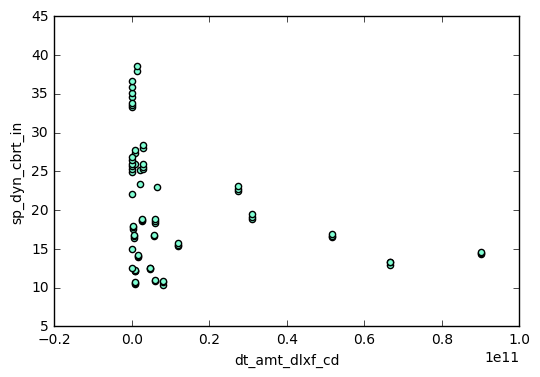

In [47]:
# representación gráfica de la relación
plt.scatter(union_df2.dt_amt_dlxf_cd, union_df2.sp_dyn_cbrt_in, c = 'aquamarine')
plt.xlabel('dt_amt_dlxf_cd')
plt.ylabel('sp_dyn_cbrt_in')

# la correlación entre los nacimientos y el indicador DT.AMT.DLXF.CD es negativa, a medida que 'dt_amt_dlxf_cd' aumenta 
# 'sp_dyn_cbrt_in' disminuye. Además, la relación entre estas variables es muy pequeña, pues es muy cercana a 0.

In [48]:
# Finalización contexto spark
sc.stop()